<a href="https://colab.research.google.com/github/sks01dev/ML-Zoomcamp/blob/main/Week%203/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 3: ML Zoomcamp
### Classification

In [1]:
# fetch the data
"""
In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.
"""


!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-12 16:37:19--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-12 16:37:19 (63.5 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Preprocessing

In [3]:
df = pd.read_csv("course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [6]:
# check for null values
df.isnull().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [24]:
k = df.select_dtypes(include="object").columns
list(k)

['lead_source', 'industry', 'employment_status', 'location']

In [18]:
# For categorical features, replace them with 'NA'
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("NA")
df.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,181
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


In [26]:
# For numerical features, replace with with 0.0
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(0.0)

In [27]:
df.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


## 2. Data Analysis

In [28]:
# What is the most frequent observation (mode) for the column industry?

df["industry"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1462 entries, 0 to 1461
Series name: industry
Non-Null Count  Dtype 
--------------  ----- 
1462 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [35]:
df["industry"].value_counts()

,count
industry,
retail,203
finance,200
other,198
healthcare,187
education,187
technology,179
manufacturing,174
NA,134


### Q1. What is the most frequent observation (mode) for the column industry?

In [37]:
df["industry"].mode()

,industry
0,retail


In [38]:
# Create the correlation matrix for the numerical features of your dataset.

num_data = df[num_cols]
num_data.head()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
0,1,79450.0,4,0.94,1
1,1,46992.0,1,0.80,0
2,5,78796.0,3,0.69,1
3,2,83843.0,1,0.87,0
4,3,85012.0,3,0.62,1


### Q2. Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

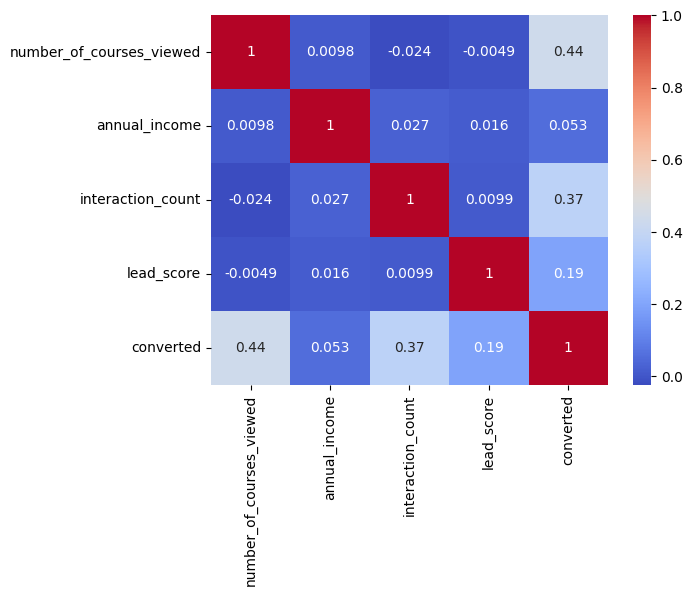

In [41]:
corr_c = num_data.corr()
sns.heatmap(corr_c, annot=True, cmap="coolwarm");

Clearly `interaction_count` and `annual_income` has the highest corr.

## 3. Model Building

In [47]:
df.head()
X = df.drop(columns="converted")
y = df["converted"]
len(y) == len(X)

True

In [81]:
# Split your data in train/val/test sets with 60%/20%/20% distribution.

from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

len(X_train) + len(X_val) + len(X_test) == len(X)

True

### Q4. Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

In [82]:
# Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.

from sklearn.metrics import mutual_info_score

# We'll store scores in a dictionary
mi_scores = {}

# Iterate over all cols
for col in X_train.columns:
    mi = mutual_info_score(y_train, X_train[col])
    mi_scores[col] = round(mi, 2)

# Convert to series for easy sorting
mi_df = pd.Series(mi_scores, name='MI_score').sort_values(ascending=False)
print(mi_df)


annual_income               0.58
number_of_courses_viewed    0.12
lead_score                  0.09
interaction_count           0.08
lead_source                 0.03
industry                    0.02
employment_status           0.02
location                    0.00
Name: MI_score, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


So, knowing `annual_income` would help us most know or get info about the target `converted`.
But since we want the categorical variable with max MI, it would be `lead_source`.

In [83]:
# Let's one hot encode the categorical cols
X_train_enc = pd.get_dummies(X_train, drop_first=False).astype(int)
X_train_enc.head().T

,442,319,767,756,424
number_of_courses_viewed,1,1,1,1,0
annual_income,61705,55199,40841,28242,64775
interaction_count,4,4,4,3,3
lead_score,0,0,0,0,0
lead_source_NA,0,0,0,0,0
lead_source_events,0,0,0,0,1
lead_source_organic_search,0,0,0,0,0
lead_source_paid_ads,0,0,0,0,0
lead_source_referral,1,1,1,1,0
lead_source_social_media,0,0,0,0,0


In [85]:
X_val_enc = pd.get_dummies(X_val, drop_first=False).astype(int)
X_val_enc.head()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,lead_source_NA,lead_source_events,lead_source_organic_search,lead_source_paid_ads,lead_source_referral,lead_source_social_media,industry_NA,industry_education,industry_finance,industry_healthcare,industry_manufacturing,industry_other,industry_retail,industry_technology,employment_status_NA,employment_status_employed,employment_status_self_employed,employment_status_student,employment_status_unemployed,location_NA,location_africa,location_asia,location_australia,location_europe,location_middle_east,location_north_america,location_south_america
886,1,63127,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
619,6,75389,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
548,2,66519,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1046,3,60910,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
618,0,63425,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [86]:
# Fit the model on the training dataset
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_enc, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [93]:
baseline_acc = model.score(X_val_enc, y_val)
print(f"Baseline accuracy : {baseline_acc:.2f}")

Baseline accuracy : 0.74


### Q5. Let's find the least useful feature using the feature elimination technique.

In [94]:
# Let's find the least useful feature using the feature elimination technique.

feature_diff = {}

for col in X_train_enc.columns:
  X_train_tmp = X_train_enc.drop(columns=col)
  X_val_tmp = X_val_enc.drop(columns=col)

  tmp_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
  tmp_model.fit(X_train_tmp, y_train)
  acc = tmp_model.score(X_val_tmp, y_val)

  feature_diff[col] = round(baseline_acc-acc, 4)


In [101]:
# convert the dict to a series for sorting with most useful to least useful

diffs = pd.Series(feature_diff, name="Feature usefulness").sort_values(ascending=False)
print(diffs)

interaction_count                  0.0890
number_of_courses_viewed           0.0616
lead_source_referral               0.0103
employment_status_employed         0.0068
employment_status_unemployed       0.0068
lead_source_social_media           0.0034
location_australia                 0.0034
industry_education                 0.0000
lead_source_organic_search         0.0000
lead_source_paid_ads               0.0000
industry_NA                        0.0000
industry_healthcare                0.0000
lead_source_NA                     0.0000
lead_source_events                 0.0000
lead_score                         0.0000
employment_status_student          0.0000
industry_manufacturing             0.0000
industry_finance                   0.0000
industry_other                     0.0000
employment_status_NA               0.0000
industry_technology                0.0000
employment_status_self_employed    0.0000
industry_retail                    0.0000
location_europe                   

>The least useful feature is `lead_score`, because removing it results in the smallest change in validation accuracy (0.000), indicating it contributes the least to the model.


### Q6. Train a logistic regression with different params value.

In [105]:
"""
Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100]
"""
scores = {}
for c in [0.01, 0.1, 1, 10, 100]:
  model_c = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
  model_c.fit(X_train_enc, y_train)

  score = model_c.score(X_val_enc, y_val)
  scores[c] = round(score, 3)


In [106]:
# Convert the dict to series for sorting it and better maninpulation

score_in_series = pd.Series(scores, name="Scores from different C values").sort_values(ascending=False)
print(score_in_series)

1.00      0.743
100.00    0.743
10.00     0.743
0.01      0.740
0.10      0.740
Name: Scores from different C values, dtype: float64


## So here are the results:

We trained a regularized logistic regression with C values [0.01, 0.1, 1, 10, 100] and evaluated validation accuracy:

| C    | Accuracy |
|------|----------|
| 0.01 | 0.740    |
| 0.1  | 0.740    |
| 1    | 0.743    |
| 10   | 0.743    |
| 100  | 0.743    |

The best accuracy is **0.743**. Since multiple C values give the same accuracy, we select the **smallest C**, which is **C = 1**.


## Ending Notes

- **Data Preparation:** Filled missing values: categorical → 'NA', numerical → 0.0.  
- **Question 1:** Most frequent industry: *retail*.  
- **Question 2:** Highest correlation among given pairs: `annual_income` and `interaction_count`.  
- **Question 3:** Calculated mutual information between categorical features and target using `mutual_info_score`. Highest MI: *lead_source*.  
- **Question 4:** Trained logistic regression with one-hot encoded categorical variables. Validation accuracy ≈ 0.74.  
- **Question 5:** Feature elimination shows `lead_score` is the least useful feature (smallest change in accuracy).  
- **Question 6:** Regularized logistic regression with C ∈ [0.01, 0.1, 1, 10, 100]. Best accuracy 0.743, smallest C giving this accuracy: **1**.  

> Notes: One-hot encoding was used for logistic regression (Q4–Q6). For mutual information (Q3), original categorical variables or label encoding can be used; one-hot encoding is not required.
